In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [2]:
df=pd.read_excel(r"C:\Users\abhishekgh\Desktop\ExcelR\heart_disease.xlsx",sheet_name='Heart_disease')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4
907,57,Male,asymptomatic,142,277,True,st-t abnormality,182,FALSE,NaN,flat,reversable defect,4


In [6]:
df.size

11804

In [7]:
df.shape

(908, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [9]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [10]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [11]:
median=df['oldpeak'].median()
median

0.5

In [12]:
df=df.fillna({'oldpeak':median})

In [13]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.5,downsloping,fixed defect,4


In [14]:
df['num'].value_counts()

num
0    399
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [15]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [16]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
903    False
904    False
905    False
906    False
907    False
Length: 908, dtype: bool

In [17]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
765,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2


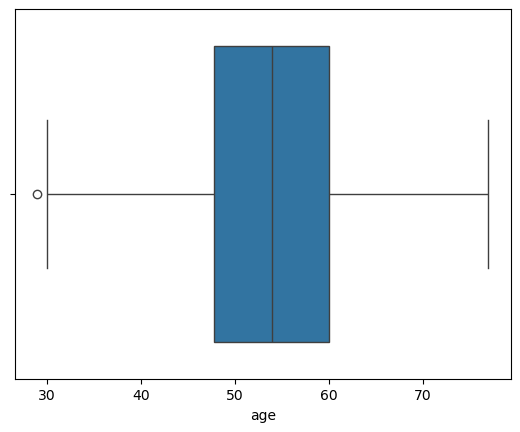

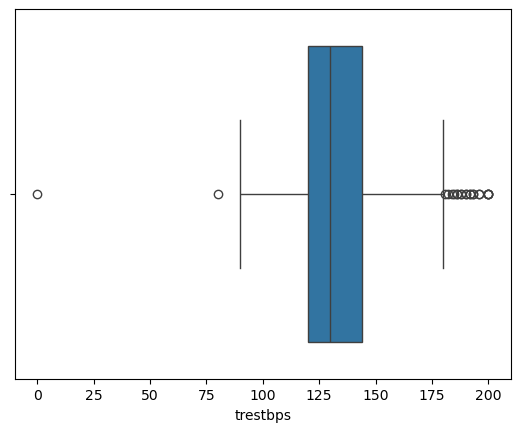

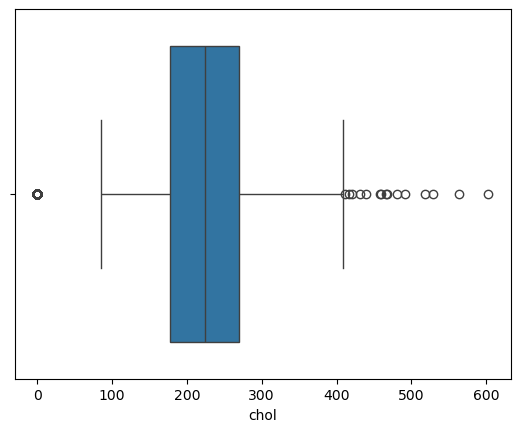

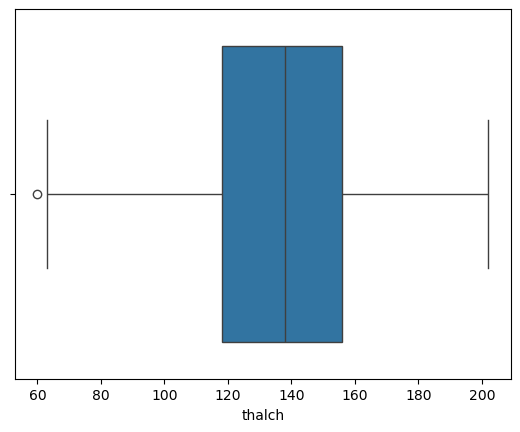

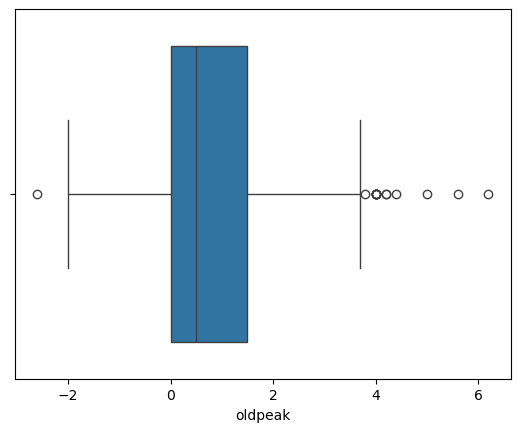

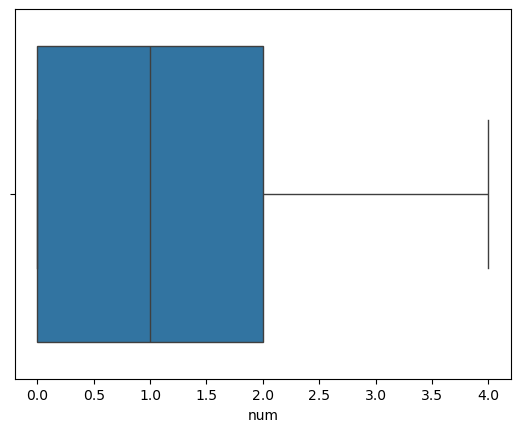

In [18]:
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [19]:
target=df[['num']]
feature=df.drop(columns=['num','fbs','exang'],axis=1)

In [20]:
target

,num
0,0
1,0
2,0
3,0
4,0
...,...
903,4
904,4
905,4
906,4


In [21]:
target.value_counts()

num
0      399
1      265
2      109
3      107
4       28
Name: count, dtype: int64

In [22]:
feature

,age,sex,cp,trestbps,chol,restecg,thalch,oldpeak,slope,thal
0,63,Male,typical angina,145,233,lv hypertrophy,150,2.3,downsloping,fixed defect
1,41,Male,atypical angina,135,203,normal,132,0.0,flat,fixed defect
2,57,Male,asymptomatic,140,192,normal,148,0.4,flat,fixed defect
3,52,Male,typical angina,118,186,lv hypertrophy,190,0.0,flat,fixed defect
4,57,Male,asymptomatic,110,201,normal,126,1.5,flat,fixed defect
...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,normal,120,1.5,upsloping,reversable defect
904,62,Male,asymptomatic,166,170,st-t abnormality,120,3.0,flat,reversable defect
905,56,Male,non-anginal,170,0,lv hypertrophy,123,2.5,downsloping,normal
906,56,Male,non-anginal,144,208,st-t abnormality,105,0.5,downsloping,fixed defect


In [23]:
feature.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalch', 'oldpeak',
       'slope', 'thal'],
      dtype='object')

In [24]:
cat_col=[i for i in feature.columns if feature[i].dtypes=='O']
num_col=[i for i in feature.columns if feature[i].dtypes!='O']

In [25]:
cat_col

['sex', 'cp', 'restecg', 'slope', 'thal']

In [26]:
feature[cat_col]

,sex,cp,restecg,slope,thal
0,Male,typical angina,lv hypertrophy,downsloping,fixed defect
1,Male,atypical angina,normal,flat,fixed defect
2,Male,asymptomatic,normal,flat,fixed defect
3,Male,typical angina,lv hypertrophy,flat,fixed defect
4,Male,asymptomatic,normal,flat,fixed defect
...,...,...,...,...,...
903,Male,asymptomatic,normal,upsloping,reversable defect
904,Male,asymptomatic,st-t abnormality,flat,reversable defect
905,Male,non-anginal,lv hypertrophy,downsloping,normal
906,Male,non-anginal,st-t abnormality,downsloping,fixed defect


In [27]:
num_col

['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

In [28]:
feature[num_col]

,age,trestbps,chol,thalch,oldpeak
0,63,145,233,150,2.3
1,41,135,203,132,0.0
2,57,140,192,148,0.4
3,52,118,186,190,0.0
4,57,110,201,126,1.5
...,...,...,...,...,...
903,53,125,0,120,1.5
904,62,166,170,120,3.0
905,56,170,0,123,2.5
906,56,144,208,105,0.5


In [29]:
ord_enc=make_pipeline(OrdinalEncoder())

In [30]:
transformer=ColumnTransformer([('ord',ord_enc,cat_col)])

In [31]:
transformer.get_feature_names_out

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(transformers=[('ord',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['sex', 'cp', 'restecg', 'slope', 'thal'])])>

In [32]:
df1=pd.DataFrame(transformer.fit_transform(feature))

In [33]:
ord_enc= make_pipeline(OrdinalEncoder())

In [34]:
transformer= ColumnTransformer([('ord',ord_enc,cat_col)])

In [35]:
transformer.get_feature_names_out

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(transformers=[('ord',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['sex', 'cp', 'restecg', 'slope', 'thal'])])>

In [36]:
df1=pd.DataFrame(transformer.fit_transform(feature))
df1

,0,1,2,3,4
0,1.0,3.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.0
2,1.0,0.0,1.0,1.0,0.0
3,1.0,3.0,0.0,1.0,0.0
4,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...
903,1.0,0.0,1.0,2.0,2.0
904,1.0,0.0,2.0,1.0,2.0
905,1.0,2.0,0.0,0.0,1.0
906,1.0,2.0,2.0,0.0,0.0


In [37]:
sta_scaler1=StandardScaler()

In [38]:
df1=sta_scaler1.fit_transform(df1)
df1

array([[ 0.51441613,  2.32027607, -1.56135215, -1.6727697 , -1.61585234],
       [ 0.51441613,  0.23225756,  0.01387869, -0.22484321, -1.61585234],
       [ 0.51441613, -0.81175169,  0.01387869, -0.22484321, -1.61585234],
       ...,
       [ 0.51441613,  1.27626682, -1.56135215, -1.6727697 , -0.25481902],
       [ 0.51441613,  1.27626682,  1.58910952, -1.6727697 , -1.61585234],
       [ 0.51441613, -0.81175169,  1.58910952, -0.22484321,  1.10621431]])

In [39]:
df1=pd.DataFrame(sta_scaler1.fit_transform(df1))
df1

,0,1,2,3,4
0,0.514416,2.320276,-1.561352,-1.672770,-1.615852
1,0.514416,0.232258,0.013879,-0.224843,-1.615852
2,0.514416,-0.811752,0.013879,-0.224843,-1.615852
3,0.514416,2.320276,-1.561352,-0.224843,-1.615852
4,0.514416,-0.811752,0.013879,-0.224843,-1.615852
...,...,...,...,...,...
903,0.514416,-0.811752,0.013879,1.223083,1.106214
904,0.514416,-0.811752,1.589110,-0.224843,1.106214
905,0.514416,1.276267,-1.561352,-1.672770,-0.254819
906,0.514416,1.276267,1.589110,-1.672770,-1.615852


In [40]:
feature[num_col]

,age,trestbps,chol,thalch,oldpeak
0,63,145,233,150,2.3
1,41,135,203,132,0.0
2,57,140,192,148,0.4
3,52,118,186,190,0.0
4,57,110,201,126,1.5
...,...,...,...,...,...
903,53,125,0,120,1.5
904,62,166,170,120,3.0
905,56,170,0,123,2.5
906,56,144,208,105,0.5


In [41]:
std_scaler=StandardScaler()

In [42]:
df2=std_scaler.fit_transform(feature[num_col])

In [43]:
df2

array([[ 1.00602683,  0.56739446,  0.28129674,  0.5241831 ,  1.35440293],
       [-1.39756029,  0.07696688,  0.01352615, -0.14770527, -0.81571758],
       [ 0.35050307,  0.32218067, -0.0846564 ,  0.44952884, -0.43830532],
       ...,
       [ 0.24124911,  1.7934634 , -1.79838815, -0.48364946,  1.54310906],
       [ 0.24124911,  0.5183517 ,  0.05815458, -1.15553783, -0.34395225],
       [ 0.35050307,  0.42026619,  0.67402693,  1.71865132, -0.34395225]])

In [44]:
df2=pd.DataFrame(std_scaler.fit_transform(df2))

In [45]:
df2

,0,1,2,3,4
0,1.006027,0.567394,0.281297,0.524183,1.354403
1,-1.397560,0.076967,0.013526,-0.147705,-0.815718
2,0.350503,0.322181,-0.084656,0.449529,-0.438305
3,-0.195767,-0.756760,-0.138211,2.017268,-0.815718
4,0.350503,-1.149102,-0.004325,-0.371668,0.599578
...,...,...,...,...,...
903,-0.086513,-0.413461,-1.798388,-0.595631,0.599578
904,0.896773,1.597292,-0.281021,-0.595631,2.014874
905,0.241249,1.793463,-1.798388,-0.483649,1.543109
906,0.241249,0.518352,0.058155,-1.155538,-0.343952


In [46]:
feature=pd.concat([df1,df2],axis=1,ignore_index=True)

In [47]:
feature

,0,1,2,3,4,5,6,7,8,9
0,0.514416,2.320276,-1.561352,-1.672770,-1.615852,1.006027,0.567394,0.281297,0.524183,1.354403
1,0.514416,0.232258,0.013879,-0.224843,-1.615852,-1.397560,0.076967,0.013526,-0.147705,-0.815718
2,0.514416,-0.811752,0.013879,-0.224843,-1.615852,0.350503,0.322181,-0.084656,0.449529,-0.438305
3,0.514416,2.320276,-1.561352,-0.224843,-1.615852,-0.195767,-0.756760,-0.138211,2.017268,-0.815718
4,0.514416,-0.811752,0.013879,-0.224843,-1.615852,0.350503,-1.149102,-0.004325,-0.371668,0.599578
...,...,...,...,...,...,...,...,...,...,...
903,0.514416,-0.811752,0.013879,1.223083,1.106214,-0.086513,-0.413461,-1.798388,-0.595631,0.599578
904,0.514416,-0.811752,1.589110,-0.224843,1.106214,0.896773,1.597292,-0.281021,-0.595631,2.014874
905,0.514416,1.276267,-1.561352,-1.672770,-0.254819,0.241249,1.793463,-1.798388,-0.483649,1.543109
906,0.514416,1.276267,1.589110,-1.672770,-1.615852,0.241249,0.518352,0.058155,-1.155538,-0.343952


In [48]:
correlation=feature.corr()
correlation

,0,1,2,3,4,5,6,7,8,9
0,1.000000,-0.125130,0.078158,-0.045065,0.068439,0.052194,0.016441,-0.191513,-0.178794,0.088802
1,-0.125130,1.000000,-0.072048,0.092177,-0.080093,-0.067589,0.009078,0.071160,0.248211,-0.174732
2,0.078158,-0.072048,1.000000,-0.084796,-0.112161,-0.007518,0.058148,-0.194473,-0.195198,-0.048425
3,-0.045065,0.092177,-0.084796,1.000000,0.044712,-0.054644,0.006748,0.047292,0.224048,-0.184311
4,0.068439,-0.080093,-0.112161,0.044712,1.000000,0.058691,0.056369,-0.016943,0.006171,0.094374
5,0.052194,-0.067589,-0.007518,-0.054644,0.058691,1.000000,0.253999,-0.099967,-0.328088,0.217942
6,0.016441,0.009078,0.058148,0.006748,0.056369,0.253999,1.000000,0.117488,-0.133360,0.134945
7,-0.191513,0.071160,-0.194473,0.047292,-0.016943,-0.099967,0.117488,1.000000,0.197907,0.032205
8,-0.178794,0.248211,-0.195198,0.224048,0.006171,-0.328088,-0.133360,0.197907,1.000000,-0.112624
9,0.088802,-0.174732,-0.048425,-0.184311,0.094374,0.217942,0.134945,0.032205,-0.112624,1.000000


[]

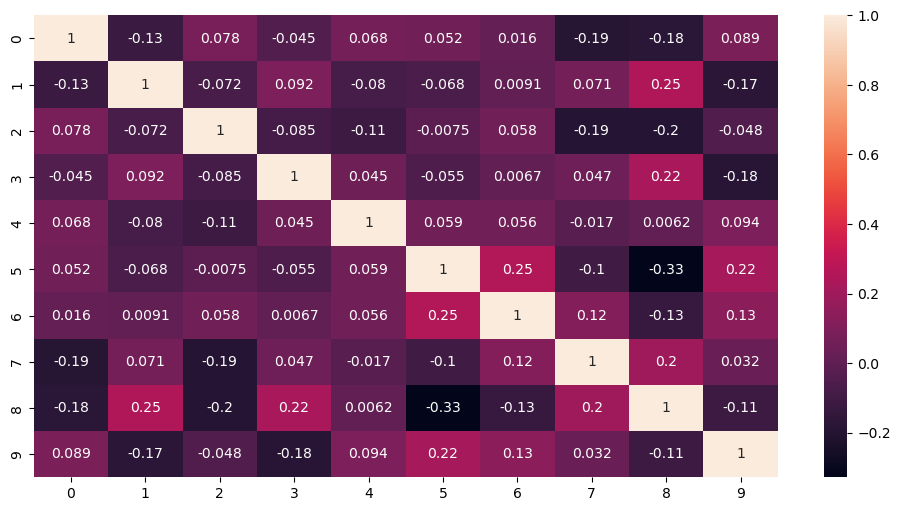

In [49]:
plt.figure(figsize=(12,6))
sns.heatmap(correlation,annot=True)
plt.plot()

In [50]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,train_size=0.75,random_state=200)

In [51]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(681, 10)
(681, 1)
(227, 10)
(227, 1)


In [52]:
decision_tree=DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=3)

In [53]:
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, splitter='random')

In [54]:
y_predict=decision_tree.predict(x_test)

In [55]:
y_predict

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 3, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 3, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 3, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 3, 0, 1, 3, 1, 3, 3, 0, 3, 1, 0, 1, 0,
       0, 1, 1, 3, 0, 1, 0, 0, 1, 1, 1, 3, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 3, 0, 0, 3, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 3, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 3, 3, 1, 3, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [56]:
accuracy_score(y_test,y_predict)

0.5286343612334802

In [57]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74        99
           1       0.40      0.64      0.49        66
           2       0.00      0.00      0.00        30
           3       0.18      0.12      0.14        25
           4       0.00      0.00      0.00         7

    accuracy                           0.53       227
   macro avg       0.26      0.30      0.27       227
weighted avg       0.45      0.53      0.48       227



C:\Users\abhishekgh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abhishekgh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abhishekgh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


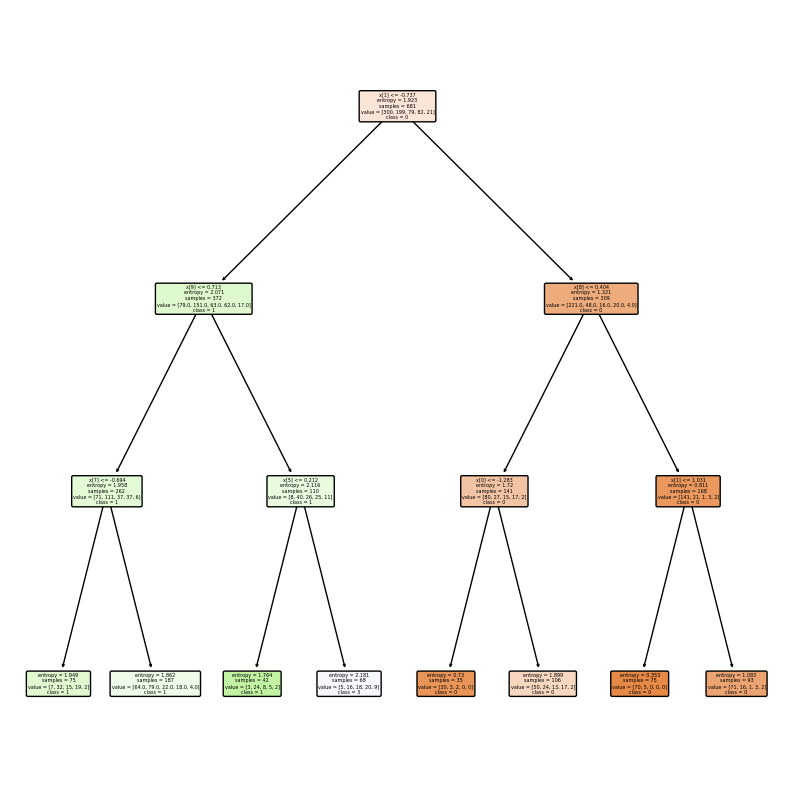

In [58]:
plt.figure(figsize=(10,10))
plot_tree(decision_tree,filled=True,max_depth=4,rounded=True,class_names=['0','1','2','3','4']);

## Interview Questions

## 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Criterion

Definition: The function used to measure the quality of a split (e.g., Gini impurity, entropy for classification, mean squared error for regression).
Effect: Different criteria can lead to different tree structures. The choice can affect both model accuracy and interpretability.

## 2. What is the difference between the Label encoding and One-hot encoding?

## Label Encoder

Definition: Label encoding converts each category of a categorical variable into a unique integer.

Characteristics

Simple: Easy to implement and does not increase the dimensionality of the data.

Ordinal Interpretation: Introduces a notion of order among the categories, which may not be appropriate for nominal variables 

## OneHot Encoder

Definition: One-hot encoding creates binary columns for each category of a categorical variable.

Characteristics:


No Ordinal Assumption: Each category is represented independently, which avoids introducing any ordinal relationship

Increased Dimensionality: The number of features increases with the number of categories, which can lead to a sparse matrix if there are many categories.